# Prediction of health insurance amount

In [ ]:
#Import libraries
import pandas as pd
import pandas_profiling as pp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp

In [5]:
#Read dataset
heart = pd.read_csv(r"../../Dataset/heart.csv")
diab = pd.read_csv(r"../../Dataset/diabetes.csv")
cancer = pd.read_csv(r"../../Dataset/cancer.csv")

Three most expensive diseases in the world according to National Association for Biomedical Research :
1. Heart disease
2. Diabetes 
3. Cancer 

## Analysis of Disease Indicators
We will analyse each dataset of the diseases such as heart disease, diabetes and cancer to find risk factors of the particular disease. We will then apply intersection between three sets for feature selection.

### Analysis of Heart Disease Indicators dataset

In [6]:
# View first 10 entries of the dataset.
heart.head(10)

,HeartDisease,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HealthyEatingHabits,HvyAlcoholConsump,Gender,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,9,4,3
1,0,0,0,0,25,1,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,1,0,0,9,4,8
3,0,1,0,1,27,0,0,1,0,0,11,3,6
4,0,1,1,1,24,0,0,1,0,0,11,5,4
5,0,1,1,1,25,1,0,1,0,1,10,6,8
6,0,1,0,1,30,1,0,0,0,0,9,6,7
7,0,1,1,1,25,1,0,0,0,0,11,4,4
8,1,1,1,1,30,1,0,1,0,0,9,5,1
9,0,0,0,1,24,0,0,0,0,1,8,4,3


In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   HeartDisease         253680 non-null  int64
 1   HighBP               253680 non-null  int64
 2   HighChol             253680 non-null  int64
 3   CholCheck            253680 non-null  int64
 4   BMI                  253680 non-null  int64
 5   Smoker               253680 non-null  int64
 6   Stroke               253680 non-null  int64
 7   HealthyEatingHabits  253680 non-null  int64
 8   HvyAlcoholConsump    253680 non-null  int64
 9   Gender               253680 non-null  int64
 10  Age                  253680 non-null  int64
 11  Education            253680 non-null  int64
 12  Income               253680 non-null  int64
dtypes: int64(13)
memory usage: 25.2 MB


Observation : No null values.

In [8]:
df = heart.copy()

In [9]:
importances = df.drop("HeartDisease", axis=1).apply(lambda x: x.corr(df.HeartDisease))
indices = np.argsort(importances)
print(importances[indices])

Income                -0.141011
Education             -0.099600
HvyAlcoholConsump     -0.028991
HealthyEatingHabits   -0.019790
CholCheck              0.044206
BMI                    0.052904
Gender                 0.086096
Smoker                 0.114441
HighChol               0.180765
Stroke                 0.203002
HighBP                 0.209361
Age                    0.221618
dtype: float64


In [10]:
def find_correlations(X):
    for i in range(0,len(X.columns)):
        for j in  range(0,len(X.columns)):
            if i!=j:
                corr_1=np.abs(X[X.columns[i]].corr(X[X.columns[j]]))
                if corr_1 <0.2:
                    print( X.columns[i] , " is not correlated  with ", X.columns[j])
                elif corr_1>=0.2:
                    print( X.columns[i] , " is correlated  with ", X.columns[j])
                

In [11]:
#Finding independant features
X= df[['Age','HighBP','Stroke','HighChol','Smoker','Gender','BMI','CholCheck']]
find_correlations(X)

Age  is correlated  with  HighBP
Age  is not correlated  with  Stroke
Age  is correlated  with  HighChol
Age  is not correlated  with  Smoker
Age  is not correlated  with  Gender
Age  is not correlated  with  BMI
Age  is not correlated  with  CholCheck
HighBP  is correlated  with  Age
HighBP  is not correlated  with  Stroke
HighBP  is correlated  with  HighChol
HighBP  is not correlated  with  Smoker
HighBP  is not correlated  with  Gender
HighBP  is correlated  with  BMI
HighBP  is not correlated  with  CholCheck
Stroke  is not correlated  with  Age
Stroke  is not correlated  with  HighBP
Stroke  is not correlated  with  HighChol
Stroke  is not correlated  with  Smoker
Stroke  is not correlated  with  Gender
Stroke  is not correlated  with  BMI
Stroke  is not correlated  with  CholCheck
HighChol  is correlated  with  Age
HighChol  is correlated  with  HighBP
HighChol  is not correlated  with  Stroke
HighChol  is not correlated  with  Smoker
HighChol  is not correlated  with  Gender
Hi

Selected features : Age, Stroke, Smoker, Gender and BMI.

In [12]:
heartArr = np.array(["Age","Stroke","Smoker","Gender","BMI"])

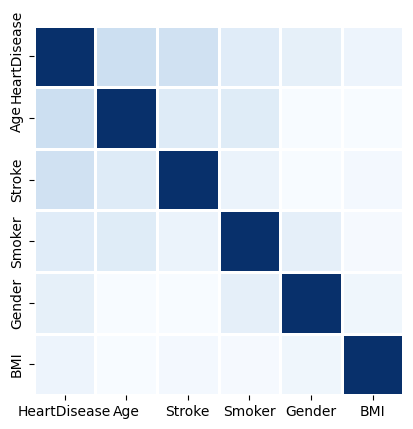

In [13]:
data = heart[["HeartDisease","Age","Stroke","Smoker","Gender","BMI"]]
corr = data.corr()

ax1 = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
mp.show()

In [ ]:
#Report
report1 = pp.ProfileReport(df)

#Save the report in HTML format.
report1.to_file("..\..\Report\Heart.html")

### Analysis of Diabetes Indicators dataset

In [15]:
diab.head(10)

,diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,HealthyEatingHabits,HvyAlcoholConsump,Gender,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,9,4,3
1,0,0,0,0,25,1,0,0,0,7,6,1
2,0,1,1,1,28,0,1,0,0,9,4,8
3,0,1,0,1,27,0,1,0,0,11,3,6
4,0,1,1,1,24,0,1,0,0,11,5,4
5,0,1,1,1,25,1,1,0,1,10,6,8
6,0,1,0,1,30,1,0,0,0,9,6,7
7,0,1,1,1,25,1,0,0,0,11,4,4
8,2,1,1,1,30,1,1,0,0,9,5,1
9,0,0,0,1,24,0,0,0,1,8,4,3


In [16]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   diabetes             253680 non-null  int64
 1   HighBP               253680 non-null  int64
 2   HighChol             253680 non-null  int64
 3   CholCheck            253680 non-null  int64
 4   BMI                  253680 non-null  int64
 5   Smoker               253680 non-null  int64
 6   HealthyEatingHabits  253680 non-null  int64
 7   HvyAlcoholConsump    253680 non-null  int64
 8   Gender               253680 non-null  int64
 9   Age                  253680 non-null  int64
 10  Education            253680 non-null  int64
 11  Income               253680 non-null  int64
dtypes: int64(12)
memory usage: 23.2 MB


In [17]:
df1 = diab.copy()

In [18]:
importances = df1.drop("diabetes", axis=1).apply(lambda x: x.corr(diab.diabetes))
indices = np.argsort(importances)
print(importances[indices])

Income                -0.171483
Education             -0.130517
HvyAlcoholConsump     -0.057882
HealthyEatingHabits   -0.042192
Gender                 0.031040
Smoker                 0.062914
CholCheck              0.067546
Age                    0.185026
HighChol               0.209085
BMI                    0.224379
HighBP                 0.271596
dtype: float64


In [19]:
df2 = df1[["Age","HighBP","BMI","HighChol","CholCheck","Smoker","Gender"]]
find_correlations(df2)

Age  is correlated  with  HighBP
Age  is not correlated  with  BMI
Age  is correlated  with  HighChol
Age  is not correlated  with  CholCheck
Age  is not correlated  with  Smoker
Age  is not correlated  with  Gender
HighBP  is correlated  with  Age
HighBP  is correlated  with  BMI
HighBP  is correlated  with  HighChol
HighBP  is not correlated  with  CholCheck
HighBP  is not correlated  with  Smoker
HighBP  is not correlated  with  Gender
BMI  is not correlated  with  Age
BMI  is correlated  with  HighBP
BMI  is not correlated  with  HighChol
BMI  is not correlated  with  CholCheck
BMI  is not correlated  with  Smoker
BMI  is not correlated  with  Gender
HighChol  is correlated  with  Age
HighChol  is correlated  with  HighBP
HighChol  is not correlated  with  BMI
HighChol  is not correlated  with  CholCheck
HighChol  is not correlated  with  Smoker
HighChol  is not correlated  with  Gender
CholCheck  is not correlated  with  Age
CholCheck  is not correlated  with  HighBP
CholCheck  is

Selected features : Age, BMI, Cholcheck, Smoker, Gender

In [20]:
diabArr = np.array(["Age","BMI","Cholcheck","Smoker","Gender"])

In [21]:
data = df1[["diabetes","Age","BMI","CholCheck","Smoker","Gender"]]
corr = data.corr()

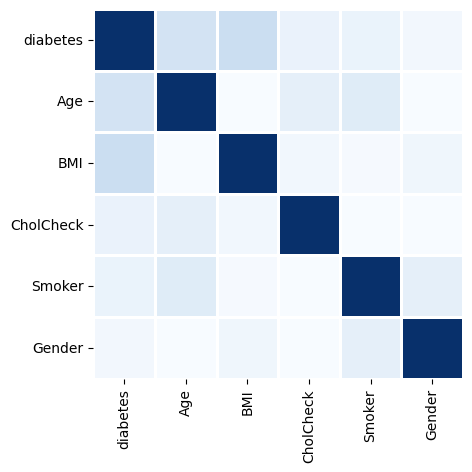

In [22]:
ax1 = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
mp.show()

In [20]:
#Report
report1 = pp.ProfileReport(df1)

#Save the report in HTML format.
report1.to_file("..\..\Report\Diabetes.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]c:\Users\sneha\OneDrive\Desktop\Predict-health-insurance-amount\venv\lib\site-packages\multimethod\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(*args, **kwargs)
Summarize dataset:  67%|██████▋   | 16/24 [00:32<00:10,  1.26s/it, Calculate kendall correlation]       c:\Users\sneha\OneDrive\Desktop\Predict-health-insurance-amount\venv\lib\site-packages\scipy\stats\_stats_py.py:5218: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 58.47it/s]


### Analysis of Cancer Indicators dataset

In [23]:
cancer.head(10)

,cancer,genetic,Gender,Age,Education,BMI,Alcoholic,Smoker,Marital
0,1.0,1.0,2,2.0,6.0,1.0,1,2,1
1,2.0,2.0,2,3.0,6.0,3.0,9,9,2
2,2.0,1.0,2,1.0,5.0,NaN,4,2,2
3,2.0,2.0,2,3.0,4.0,NaN,4,2,2
4,2.0,2.0,2,3.0,6.0,2.0,4,2,2
5,2.0,2.0,1,4.0,4.0,3.0,3,2,2
6,1.0,1.0,2,1.0,4.0,2.0,4,2,2
7,2.0,1.0,2,1.0,4.0,3.0,1,9,2
8,2.0,2.0,2,2.0,6.0,2.0,4,2,1
9,2.0,2.0,2,3.0,2.0,3.0,3,2,2


In [24]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401958 entries, 0 to 401957
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   cancer     401955 non-null  float64
 1   genetic    401955 non-null  float64
 2   Gender     401958 non-null  int64  
 3   Age        401946 non-null  float64
 4   Education  401946 non-null  float64
 5   BMI        360601 non-null  float64
 6   Alcoholic  401958 non-null  int64  
 7   Smoker     401958 non-null  int64  
 8   Marital    401958 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 27.6 MB


In [25]:
percent_missing = cancer.isnull().sum() * 100 / len(cancer)
missing_value_df = pd.DataFrame({'column_name': cancer.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
cancer,cancer,0.000746
genetic,genetic,0.000746
Gender,Gender,0.000000
Age,Age,0.002985
Education,Education,0.002985
BMI,BMI,10.288886
Alcoholic,Alcoholic,0.000000
Smoker,Smoker,0.000000
Marital,Marital,0.000000


In [26]:
cancer1 = cancer.dropna()
cancer1 = cancer1.astype({"cancer":'int', "genetic":'int',"BMI":'int',"Education":'int'})

In [27]:
cancer1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360601 entries, 0 to 401957
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   cancer     360601 non-null  int32  
 1   genetic    360601 non-null  int32  
 2   Gender     360601 non-null  int64  
 3   Age        360601 non-null  float64
 4   Education  360601 non-null  int32  
 5   BMI        360601 non-null  int32  
 6   Alcoholic  360601 non-null  int64  
 7   Smoker     360601 non-null  int64  
 8   Marital    360601 non-null  int64  
dtypes: float64(1), int32(4), int64(4)
memory usage: 22.0 MB


In [29]:
importances = cancer1.drop("cancer", axis=1).apply(lambda x: x.corr(cancer1.cancer))
indices = np.argsort(importances)
print(importances[indices])

Marital     -0.145044
Education   -0.031161
Alcoholic   -0.003633
Gender       0.002071
Smoker       0.011339
BMI          0.013979
Age          0.066030
genetic      0.173176
dtype: float64


In [30]:
df3= cancer1[["genetic","Age","BMI","Smoker","Gender"]]
find_correlations(df3)

genetic  is not correlated  with  Age
genetic  is not correlated  with  BMI
genetic  is not correlated  with  Smoker
genetic  is not correlated  with  Gender
Age  is not correlated  with  genetic
Age  is not correlated  with  BMI
Age  is not correlated  with  Smoker
Age  is not correlated  with  Gender
BMI  is not correlated  with  genetic
BMI  is not correlated  with  Age
BMI  is not correlated  with  Smoker
BMI  is not correlated  with  Gender
Smoker  is not correlated  with  genetic
Smoker  is not correlated  with  Age
Smoker  is not correlated  with  BMI
Smoker  is not correlated  with  Gender
Gender  is not correlated  with  genetic
Gender  is not correlated  with  Age
Gender  is not correlated  with  BMI
Gender  is not correlated  with  Smoker


Selected features : Genetic, Age, BMI, Smoker, Gender

In [31]:
cancerArr = ["genetic","Age","BMI","Smoker","Gender"]

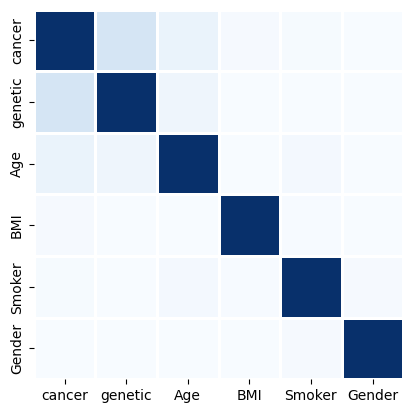

In [32]:
data = cancer1[["cancer","genetic","Age","BMI","Smoker","Gender"]]
corr = data.corr()
ax1 = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
mp.show()

In [30]:
#Report
report1 = pp.ProfileReport(data)

#Save the report in HTML format.
report1.to_file("..\..\Report\Cancer.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]c:\Users\sneha\OneDrive\Desktop\Predict-health-insurance-amount\venv\lib\site-packages\multimethod\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(*args, **kwargs)
Summarize dataset:  42%|████▏     | 8/19 [00:31<00:38,  3.50s/it, Calculate auto correlation]c:\Users\sneha\OneDrive\Desktop\Predict-health-insurance-amount\venv\lib\site-packages\multimethod\__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)
Summarize dataset:  58%|█████▊    | 11/19 [00:35<00:15,  1.90s/it, Calculate kendall correlation] c:\Users\sneha\OneDrive\Desktop\Predict-health-insurance-amount\venv\lib\site-packages\scipy\

In [33]:
#Intersection operation applied to select final set of features.
HeartAndDiab = np.intersect1d(heartArr,diabArr)
features = np.intersect1d(HeartAndDiab,cancerArr)
print(features)

['Age' 'BMI' 'Gender' 'Smoker']


## Data Analysis for insurance dataset

### Data preprocessing

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [36]:
insurance = pd.read_csv(r"..\..\Dataset\insurance.csv")

In [37]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Observations : 
  1. No null values
  2. Features with categorical values : Sex, Smoker, Region.

In [39]:
# Convert categorical features to numerical features.

numValues = {'sex': {'male' : 0 , 'female' : 1} ,
             'smoker': {'no': 0 , 'yes' : 1},
             'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
insuranceCopy = insurance.copy()
insuranceCopy.replace(numValues, inplace=True)

In [40]:
insuranceCopy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [41]:
insuranceCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [42]:
insuranceCopy.to_csv('../../Dataset/processedData.csv',index=False)

In [43]:
importances = insuranceCopy.drop("charges", axis=1).apply(lambda x: x.corr(insuranceCopy.charges))
indices = np.argsort(importances)
print(importances[indices])

sex        -0.057292
region      0.011741
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
dtype: float64


<AxesSubplot:>

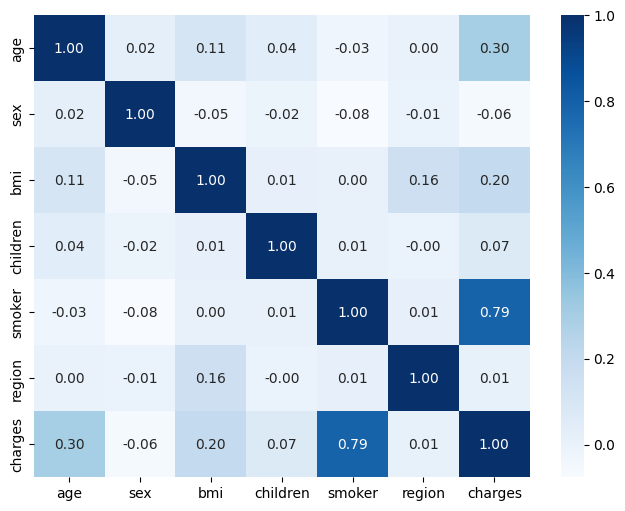

In [44]:
corr = insuranceCopy.corr()
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr,cmap='Blues',annot=True,fmt=".2f",ax=ax)

In [46]:
# Scale the values
scaledVal = insuranceCopy.copy()

temp1 = scaledVal.bmi
temp1 = temp1.values.reshape(-1,1)
scaledVal['bmi'] = StandardScaler().fit_transform(temp1)

temp2 = scaledVal.age
temp2 = temp2.values.reshape(-1,1)
scaledVal['age'] = StandardScaler().fit_transform(temp2)

temp3 = scaledVal.charges
temp3 = temp3.values.reshape(-1,1)
scaledVal['charges'] = StandardScaler().fit_transform(temp3)

scaledVal.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,0,0.719843
4,-0.513149,0,-0.292556,0,0,0,-0.776802


In [47]:
scaledVal.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,0,0.719843
4,-0.513149,0,-0.292556,0,0,0,-0.776802


In [48]:
scaledVal.to_csv('../../Dataset/scaledData.csv',index=False)